# Medhat Fawzy 
medhatfawzy38@gmail.com

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
data = pd.read_csv("Iris.csv")

In [184]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [186]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [187]:
# See how skewed our dataset is 
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Turns Out it's not Skewed at all

In [188]:
# Id column is redundant it's better to remove it, it won't be used during training as well
data.drop("Id", axis=1, inplace=True)

In [189]:
data.duplicated().sum()

3

In [190]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [191]:
# Statisfied Sampling to make sure we don't have a skewed test_set or a train_set
strat_sampling = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
for train_index, test_index in strat_sampling.split(data, data["Species"]):
    strat_train_set = data.iloc[train_index]    
    strat_test_set = data.iloc[test_index]

In [192]:
strat_train_set["Species"].value_counts() / len(strat_train_set)

Iris-versicolor    0.341880
Iris-virginica     0.333333
Iris-setosa        0.324786
Name: Species, dtype: float64

In [193]:
strat_test_set["Species"].value_counts() / len(strat_test_set)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [194]:
len(strat_train_set), len(strat_test_set)

(117, 30)

In [195]:
strat_train_set.sample(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,6.5,3.0,5.5,1.8,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


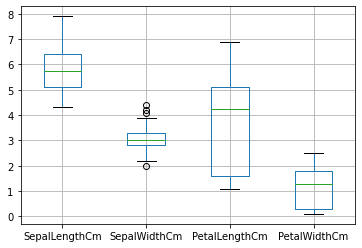

In [196]:
# Boxplot to check for outliers and to gain some insights about the data
start_tarin_set.boxplot(column=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
plt.show()

As shown in the graph outliers are values above 3.9 or below 2.1. These values can cause a problem to some ML algorithms


In [233]:
# count how many outliers we have
print(strat_train_set["SepalWidthCm"].where(strat_train_set["SepalWidthCm"] < 2.1).value_counts().sum())
print(strat_train_set["SepalWidthCm"].where(strat_train_set["SepalWidthCm"] > 3.9).value_counts().sum())

1
3


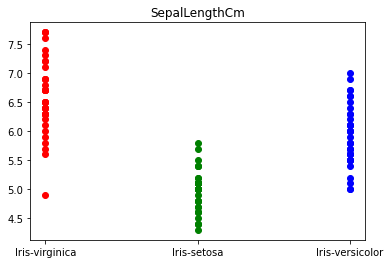

In [234]:
virginica_class = strat_train_set.query('`Species` == "Iris-virginica"')
setosa_class = strat_train_set.query('`Species` == "Iris-setosa"')
versicolor_class = strat_train_set.query('`Species` == "Iris-versicolor"')
plt.scatter(y=virginica_class["SepalLengthCm"], x=virginica_class["Species"], c='r')
plt.scatter(y=setosa_class["SepalLengthCm"], x=setosa_class["Species"], c='g')
plt.scatter(y=versicolor_class["SepalLengthCm"], x=versicolor_class["Species"],  c='b')
plt.title("SepalLengthCm")
plt.show()

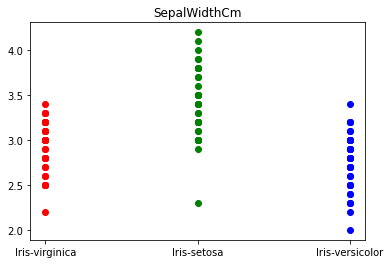

In [235]:
plt.scatter(y=virginica_class["SepalWidthCm"], x=virginica_class["Species"], c='r')
plt.scatter(y=setosa_class["SepalWidthCm"], x=setosa_class["Species"], c='g')
plt.scatter(y=versicolor_class["SepalWidthCm"], x=versicolor_class["Species"],  c='b')
plt.title("SepalWidthCm")
plt.show()

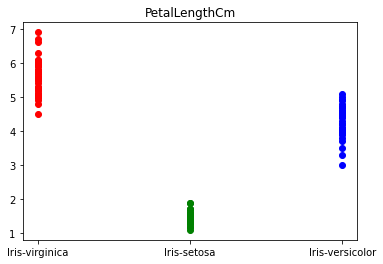

In [236]:
plt.scatter(y=virginica_class["PetalLengthCm"], x=virginica_class["Species"], c='r')
plt.scatter(y=setosa_class["PetalLengthCm"], x=setosa_class["Species"], c='g')
plt.scatter(y=versicolor_class["PetalLengthCm"], x=versicolor_class["Species"],  c='b')
plt.title("PetalLengthCm")
plt.show()

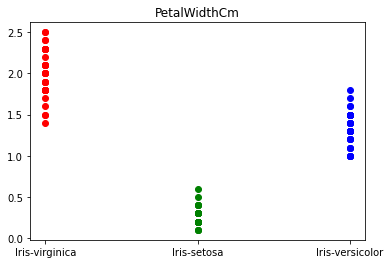

In [237]:
plt.scatter(y=virginica_class["PetalWidthCm"], x=virginica_class["Species"], c='r')
plt.scatter(y=setosa_class["PetalWidthCm"], x=setosa_class["Species"], c='g')
plt.scatter(y=versicolor_class["PetalWidthCm"], x=versicolor_class["Species"],  c='b')
plt.title("PetalWidthCm")
plt.show()

- The information gain with features like "PetalLengthCm" and "PetalWidthCm" seems higher so let's focus on these two features and plot a scatter plot for the three species

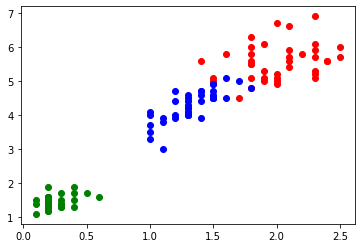

In [242]:
plt.scatter(x=virginica_class["PetalWidthCm"], y=virginica_class["PetalLengthCm"], c='r')
plt.scatter(x=setosa_class["PetalWidthCm"], y=setosa_class["PetalLengthCm"], c='g')
plt.scatter(x=versicolor_class["PetalWidthCm"], y=versicolor_class["PetalLengthCm"], c='b')
plt.show()

- Let's see how this compares to other features combinations.

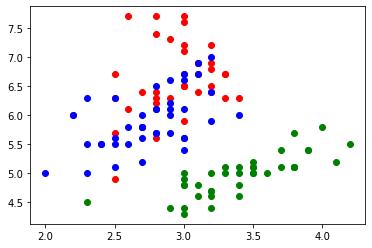

In [244]:
plt.scatter(x=virginica_class["SepalWidthCm"], y=virginica_class["SepalLengthCm"], c='r')
plt.scatter(x=setosa_class["SepalWidthCm"], y=setosa_class["SepalLengthCm"], c='g')
plt.scatter(x=versicolor_class["SepalWidthCm"], y=versicolor_class["SepalLengthCm"], c='b')
plt.show()

- Not easily separatable like the previous features combinations, but lucky for us Tree classifier automatically picks the best features for classification.

In [248]:
# Splitting into data and labels
X_train = strat_train_set.drop("Species", axis=1)
y_train = strat_train_set["Species"]
X_test = strat_test_set.drop("Species", axis=1)
y_test = strat_test_set["Species"]

In [249]:
# Creating the model and training it
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [251]:
# testing our model accuracy on the test set
model.score(X_test, y_test)

1.0

In [252]:
# testing our model accuracy on whole dataset
y_total = data["Species"]
X_total = data.drop("Species", axis=1)

In [202]:
model.score(X_total, y_total)

1.0